In [39]:
# now we will train RF, DT and SVM with only the features which were seleceted by lasso (color based features)

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
# importing the necessary files
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [42]:
with open('./pickle/lapZeroBrownSpot.pickle', 'rb') as handle:
    lapZeroBrownSpot = pickle.load(handle)
    
with open('./pickle/lapZeroHealthy.pickle', 'rb') as handle:
    lapZeroHealthy = pickle.load(handle)
    
with open('./pickle/lapZeroHispa.pickle', 'rb') as handle:
    lapZeroHispa = pickle.load(handle)
    
with open('./pickle/lapZeroLeafBlast.pickle', 'rb') as handle:
    lapZeroLeafBlast = pickle.load(handle)
    
with open('./pickle/lapOneBrownSpot.pickle', 'rb') as handle:
    lapOneBrownSpot = pickle.load(handle)
    
with open('./pickle/lapOneHealthy.pickle', 'rb') as handle:
    lapOneHealthy = pickle.load(handle)
    
with open('./pickle/lapOneHispa.pickle', 'rb') as handle:
    lapOneHispa = pickle.load(handle)
    
with open('./pickle/lapOneLeafBlast.pickle', 'rb') as handle:
    lapOneLeafBlast = pickle.load(handle)
    
with open('./pickle/lapTwoBrownSpot.pickle', 'rb') as handle:
    lapTwoBrownSpot = pickle.load(handle)
    
with open('./pickle/lapTwoHealthy.pickle', 'rb') as handle:
    lapTwoHealthy = pickle.load(handle)
    
with open('./pickle/lapTwoHispa.pickle', 'rb') as handle:
    lapTwoHispa = pickle.load(handle)
    
with open('./pickle/lapTwoLeafBlast.pickle', 'rb') as handle:
    lapTwoLeafBlast = pickle.load(handle)

In [43]:
# We will use features which were selected only by Lasso
# those features are aggregated laplacian coefficient red, green and blue color channels

featuresSelectedByLasso = []

target = []

for i in range(523):
    featuresSelectedByLasso.append([lapZeroBrownSpot[i], lapOneBrownSpot[i], lapTwoBrownSpot[i]])
    target.append(0) # we are representing brownspot class as '0'
    featuresSelectedByLasso.append([lapZeroHealthy[i], lapOneHealthy[i], lapTwoHealthy[i]])
    target.append(1) # we are representing healthy class as '1'
    featuresSelectedByLasso.append([lapZeroHispa[i], lapOneHispa[i], lapTwoHispa[i]])
    target.append(2) # we are representing hispa class as '2'
    featuresSelectedByLasso.append([lapZeroLeafBlast[i], lapOneLeafBlast[i], lapTwoLeafBlast[i]])
    target.append(3) # we are representing leaf blast class as '3'

In [44]:
featuresSelectedByLasso = np.array(featuresSelectedByLasso)
target = np.array(target)

In [46]:
columnsOfDataframe = ['laplacian zero', 'laplacian one', 'laplacian two']

In [47]:
df = pd.DataFrame(data=np.c_[featuresSelectedByLasso, target], columns=columnsOfDataframe + ['target'])

In [48]:
df.head()

,laplacian zero,laplacian one,laplacian two,target
0,202035314,130274018,326438316,0
1,57311835,92589406,417514567,1
2,599509635,195771643,698701186,2
3,60663745,330155952,365917071,3
4,504567341,303905779,797751776,0


In [49]:
X = df.drop('target', axis = 1)
y = df['target']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
parameterGrid = { 
    'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [1, 2, 3, 6, 9], 
}

In [15]:
gridSearch = GridSearchCV(RandomForestClassifier(), 
                           param_grid=parameterGrid) 
gridSearch.fit(X_train, y_train) 
print(gridSearch.best_estimator_)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=166)


In [53]:
model = RandomForestClassifier(n_estimators=166, max_depth=6, max_features=None, max_leaf_nodes=9, random_state=42)

In [54]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=166, random_state=42)

In [55]:
y_pred = model.predict(X_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.4701670644391408


In [62]:
# now I will represent the preformance of the RF model by a confusion matrix

In [65]:
cm = confusion_matrix(y_test, y_pred)

In [66]:
cmDF = pd.DataFrame(cm,
                     index = ['Brown Spot','Healthy','Hispa', 'Leaf Blast'], 
                     columns = ['Brown Spot','Healthy','Hispa', 'Leaf Blast'])

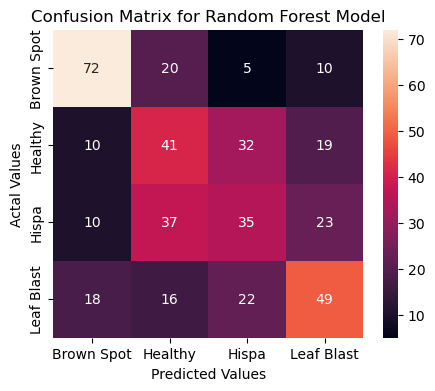

In [67]:
# plotting the confusion matrix to represent the preformance of Random Forest Model
plt.figure(figsize=(5,4))
sns.heatmap(cmDF, annot=True)
plt.title('Confusion Matrix for Random Forest Model')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [70]:
modelDT = DecisionTreeClassifier(random_state=42)

In [71]:
modelDT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [72]:
y_predDT = modelDT.predict(X_test)

In [73]:
accuracyDT = accuracy_score(y_test, y_predDT)

In [74]:
print(accuracyDT)

0.4081145584725537


In [ ]:
# now I will represent the preformance of the DT model by a confusion matrix

In [75]:
cmDT = confusion_matrix(y_test, y_predDT)

In [76]:
cmDTDF = pd.DataFrame(cmDT,
                     index = ['Brown Spot','Healthy','Hispa', 'Leaf Blast'], 
                     columns = ['Brown Spot','Healthy','Hispa', 'Leaf Blast'])

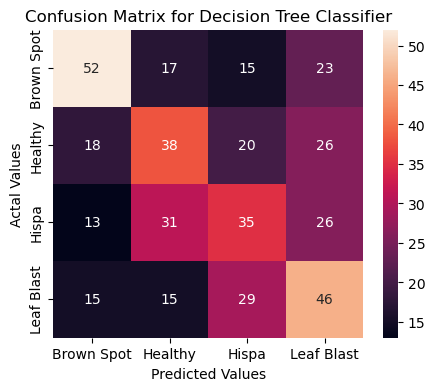

In [77]:
# plotting the confusion matrix to represent the preformance of  Decision Tree classifier
plt.figure(figsize=(5,4))
sns.heatmap(cmDTDF, annot=True)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [78]:
param_gridSVM = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1],
    'class_weight': [None, 'balanced']
}

In [79]:
clfSVM = SVC(random_state=42)

In [80]:
gridSearchSVM = GridSearchCV(clfSVM, param_gridSVM, cv=5, scoring='accuracy', n_jobs=-1)

In [81]:
gridSearchSVM.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [82]:
bestClfSVM = gridSearchSVM.best_estimator_

In [83]:
y_predSVM = bestClfSVM.predict(X_test)

In [84]:
accuracySVM = accuracy_score(y_test, y_predSVM)

In [85]:
print(accuracySVM)

0.46539379474940334


In [ ]:
# now I will represent the preformance of the SVM classifier model by a confusion matrix

In [86]:
cmSVM = confusion_matrix(y_test, y_predSVM)

In [87]:
cmSVMDF = pd.DataFrame(cmSVM,
                     index = ['Brown Spot','Healthy','Hispa', 'Leaf Blast'], 
                     columns = ['Brown Spot','Healthy','Hispa', 'Leaf Blast'])

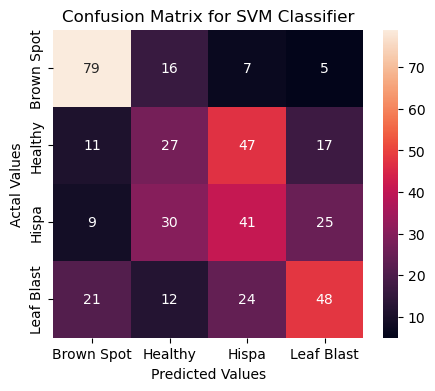

In [88]:
# plotting the confusion matrix to represent the preformance of SVM Model
plt.figure(figsize=(5,4))
sns.heatmap(cmSVMDF, annot=True)
plt.title('Confusion Matrix for SVM Classifier')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [89]:
clfLR = LogisticRegression(random_state=42)

In [90]:
clfLR.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [91]:
y_predLR = clfLR.predict(X_test)

In [92]:
accuracyLR = accuracy_score(y_test, y_predLR)

In [93]:
print(accuracyLR)

0.42482100238663484


In [94]:
# now I will represent the preformance of the Logistic Regression classifier model by a confusion matrix

In [95]:
cmLR = confusion_matrix(y_test, y_predLR)

In [96]:
cmLRDF = pd.DataFrame(cmLR,
                     index = ['Brown Spot','Healthy','Hispa', 'Leaf Blast'], 
                     columns = ['Brown Spot','Healthy','Hispa', 'Leaf Blast'])

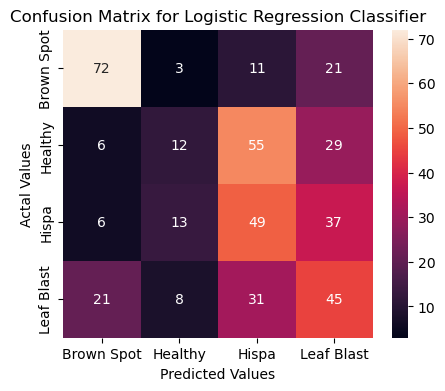

In [97]:
# plotting the confusion matrix to represent the preformance of Logistic Regression Model
plt.figure(figsize=(5,4))
sns.heatmap(cmLRDF, annot=True)
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()